In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import re
import matplotlib.pyplot as plt

In [67]:
file_name = 'HKUnemployment_LaidOff_PerIndustry_PerYear_Rate.csv' 

with open(file_name, encoding='ascii', errors='ignore') as infile:
    df = pd.read_csv(infile, skiprows = 2).dropna(how='all')
    
#remove all non-ascii, including Chinese characters 

In [68]:
df.head()

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,[4] Accommodation[4] and food services,Transportation and storage,...,Insurance,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,- Overall - Including first-time job-seekers and re-entrants into the labour force who were unemployed
0,Period,Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),...,Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%)
1,1/2008 - 3/2008,5.6,3.5,6.3,11.5,2.3,2.5,3.9,5.3,3.2,...,1.4,2.6,3.2,0.5,1.5,1.1,2.3,1.4,*,3.2
2,2/2008 - 4/2008,5.8,3.5,7,12.7,2.5,3.4,3.8,4.8,3.2,...,1.2,2.9,2.9,*,1.4,1.3,1.2,1.5,*,3.3
3,3/2008 - 5/2008,5.9,4.1,6.1,10.9,2.4,3.3,4.3,5.3,2.9,...,1.3,2.7,2.8,*,1.3,1.4,1.9,1.8,*,3.3
4,4/2008 - 6/2008,5.8,3.8,6.5,11.5,2.4,2.7,4.4,4.6,2.7,...,1.4,2.8,2.4,*,1,1.4,1.4,1.3,*,3.3


In [69]:
df.columns

Index([' Detailed previous industry',
       '   Manufacture of textiles, wearing apparel, leather and related products',
       ' Other manufacturing', ' Foundation and superstructure',
       ' Decoration, repair and maintenance for buildings',
       ' Import and export trade', ' Wholesale', ' Retail',
       '[4]   Accommodation[4] and  food services',
       ' Transportation and storage', ' Postal and courier activities',
       '  Information and communications', ' Financing', ' Insurance',
       ' Real estate', ' Professional and business services',
       ' Public administration', ' Education',
       '  Human health and social work activities ',
       ' Arts, entertainment and recreation', ' Other service activities',
       ' Other industries',
       ' -  Overall -  Including first-time job-seekers and re-entrants into the labour force who were unemployed'],
      dtype='object')

In [80]:
df.columns = df.columns.str.replace('[','')
df.columns = df.columns.str.replace('4','')
df.columns = df.columns.str.replace(']','')
df.columns = df.columns.str.replace('-','')
df.columns = df.columns.str.lstrip()

In [81]:
df.columns

Index(['Detailed previous industry',
       'Manufacture of textiles, wearing apparel, leather and related products',
       'Other manufacturing', 'Foundation and superstructure',
       'Decoration, repair and maintenance for buildings',
       'Import and export trade', 'Wholesale', 'Retail',
       'Accommodation and  food services', 'Transportation and storage',
       'Postal and courier activities', 'Information and communications',
       'Financing', 'Insurance', 'Real estate',
       'Professional and business services', 'Public administration',
       'Education', 'Human health and social work activities ',
       'Arts, entertainment and recreation', 'Other service activities',
       'Other industries',
       'Overall   Including firsttime jobseekers and reentrants into the labour force who were unemployed'],
      dtype='object')

In [82]:
df.head()

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Insurance,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed
0,Period,Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),...,Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%),Unemployment rate (%)
1,1/2008 - 3/2008,5.6,3.5,6.3,11.5,2.3,2.5,3.9,5.3,3.2,...,1.4,2.6,3.2,0.5,1.5,1.1,2.3,1.4,*,3.2
2,2/2008 - 4/2008,5.8,3.5,7,12.7,2.5,3.4,3.8,4.8,3.2,...,1.2,2.9,2.9,*,1.4,1.3,1.2,1.5,*,3.3
3,3/2008 - 5/2008,5.9,4.1,6.1,10.9,2.4,3.3,4.3,5.3,2.9,...,1.3,2.7,2.8,*,1.3,1.4,1.9,1.8,*,3.3
4,4/2008 - 6/2008,5.8,3.8,6.5,11.5,2.4,2.7,4.4,4.6,2.7,...,1.4,2.8,2.4,*,1,1.4,1.4,1.3,*,3.3


In [104]:
df = df.replace(["#",'*'],np.nan)

In [105]:
df.isnull().sum()

Detailed previous industry                                                                            0
Manufacture of textiles, wearing apparel, leather and related products                               42
Other manufacturing                                                                                   0
Foundation and superstructure                                                                         0
Decoration, repair and maintenance for buildings                                                      0
Import and export trade                                                                               0
Wholesale                                                                                             4
Retail                                                                                                0
Accommodation and  food services                                                                      0
Transportation and storage                                      

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Detailed previous industry                                                                         150 non-null    object
 1   Manufacture of textiles, wearing apparel, leather and related products                             108 non-null    object
 2   Other manufacturing                                                                                150 non-null    object
 3   Foundation and superstructure                                                                      150 non-null    object
 4   Decoration, repair and maintenance for buildings                                                   150 non-null    object
 5   I

In [438]:
df.drop(df.index[0], inplace = True)

In [439]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [440]:
profile.to_file("Unemployment_DetailedIndustry_Report.html")

In [122]:
for i in [i for i in list(range(len(df.columns))) if i not in [0]]:
    df.iloc[:,i]=pd.to_numeric(df.iloc[:,i])
    
#converts all column values except the first column to numeric    

In [123]:
df.iloc[np.where(df.columns.values==' Unemployment rate (%)')]

#checks if first row was dropped

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Insurance,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed


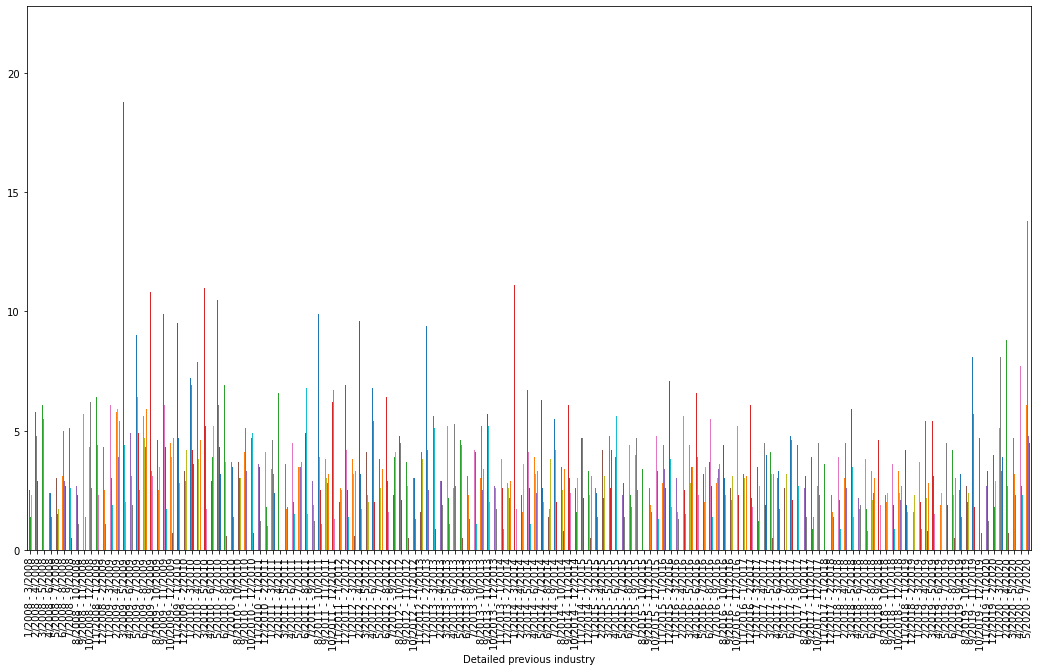

In [158]:
ax = df.plot.bar(x='Detailed previous industry', figsize=(18,10), legend = None)

In [211]:
df_T = df.T

In [212]:
df_T

,1,2,3,4,5,6,7,8,9,10,...,140,141,142,143,144,145,146,147,148,149
Detailed previous industry,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,8/2019 - 10/2019,9/2019 - 11/2019,10/2019 - 12/2019,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,NaN,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.5,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.4,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,6.7,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16
Import and export trade,2.3,2.5,2.4,2.4,2.1,2.1,2.3,2.7,3.1,3.4,...,2.3,2.5,2.4,2.7,2.8,3.5,4.1,4.7,5.3,5.2
Wholesale,2.5,3.4,3.3,2.7,3,3.3,4.5,3.3,2.5,1.5,...,2.7,3.1,3.2,3.7,4,4,4.9,4.2,3.9,3
Retail,3.9,3.8,4.3,4.4,4.6,4.3,4.6,5.2,5.7,5.4,...,4.5,4.8,4.7,4.8,5.2,5.6,7.1,7.6,7.7,8.1
Accommodation and food services,5.3,4.8,5.3,4.6,4.6,5,5.6,5.7,5.9,6.2,...,5.6,5.7,5.7,5.7,6.9,8.1,11.2,13.9,14,13.8
Transportation and storage,3.2,3.2,2.9,2.7,2.2,2.4,2.9,3.5,3.7,3.8,...,2.5,2.5,2.4,2.2,2.5,3.3,4.4,5.7,6.2,6.2


In [213]:
df_T.columns = df_T.iloc[0]

In [214]:
df_T.head()

Detailed previous industry,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,8/2019 - 10/2019,9/2019 - 11/2019,10/2019 - 12/2019,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
Detailed previous industry,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,8/2019 - 10/2019,9/2019 - 11/2019,10/2019 - 12/2019,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,NaN,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.5,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.4,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,6.7,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16


In [215]:
df_T.drop(df_T.index[0], inplace = True)

In [151]:
df_T

Detailed previous industry,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,8/2019 - 10/2019,9/2019 - 11/2019,10/2019 - 12/2019,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,NaN,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.5,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.4,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,6.7,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16
Import and export trade,2.3,2.5,2.4,2.4,2.1,2.1,2.3,2.7,3.1,3.4,...,2.3,2.5,2.4,2.7,2.8,3.5,4.1,4.7,5.3,5.2
Wholesale,2.5,3.4,3.3,2.7,3,3.3,4.5,3.3,2.5,1.5,...,2.7,3.1,3.2,3.7,4,4,4.9,4.2,3.9,3
Retail,3.9,3.8,4.3,4.4,4.6,4.3,4.6,5.2,5.7,5.4,...,4.5,4.8,4.7,4.8,5.2,5.6,7.1,7.6,7.7,8.1
Accommodation and food services,5.3,4.8,5.3,4.6,4.6,5,5.6,5.7,5.9,6.2,...,5.6,5.7,5.7,5.7,6.9,8.1,11.2,13.9,14,13.8
Transportation and storage,3.2,3.2,2.9,2.7,2.2,2.4,2.9,3.5,3.7,3.8,...,2.5,2.5,2.4,2.2,2.5,3.3,4.4,5.7,6.2,6.2
Postal and courier activities,4.3,5.2,5.5,3.8,2.4,NaN,2.6,3.8,3.8,5.4,...,2.9,2.6,NaN,NaN,2.8,NaN,2.7,NaN,4.2,5


In [141]:
#df_T['Industry'] = df_T.index

In [157]:
df_T.shape

(22, 149)

In [152]:
df_T.columns

Index(['1/2008 - 3/2008', '2/2008 - 4/2008', '3/2008 - 5/2008',
       '4/2008 - 6/2008', '5/2008 - 7/2008', '6/2008 - 8/2008',
       '7/2008 - 9/2008', '8/2008 - 10/2008', '9/2008 - 11/2008',
       '10/2008 - 12/2008',
       ...
       '8/2019 - 10/2019', '9/2019 - 11/2019', '10/2019 - 12/2019',
       '11/2019 - 1/2020', '12/2019 - 2/2020', '1/2020 - 3/2020',
       '2/2020 - 4/2020', '3/2020 - 5/2020', '4/2020 - 6/2020',
       '5/2020 - 7/2020'],
      dtype='object', name='Detailed previous industry', length=149)

In [216]:
df_T

Detailed previous industry,1/2008 - 3/2008,2/2008 - 4/2008,3/2008 - 5/2008,4/2008 - 6/2008,5/2008 - 7/2008,6/2008 - 8/2008,7/2008 - 9/2008,8/2008 - 10/2008,9/2008 - 11/2008,10/2008 - 12/2008,...,8/2019 - 10/2019,9/2019 - 11/2019,10/2019 - 12/2019,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,NaN,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.5,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.4,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,6.7,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16
Import and export trade,2.3,2.5,2.4,2.4,2.1,2.1,2.3,2.7,3.1,3.4,...,2.3,2.5,2.4,2.7,2.8,3.5,4.1,4.7,5.3,5.2
Wholesale,2.5,3.4,3.3,2.7,3,3.3,4.5,3.3,2.5,1.5,...,2.7,3.1,3.2,3.7,4,4,4.9,4.2,3.9,3
Retail,3.9,3.8,4.3,4.4,4.6,4.3,4.6,5.2,5.7,5.4,...,4.5,4.8,4.7,4.8,5.2,5.6,7.1,7.6,7.7,8.1
Accommodation and food services,5.3,4.8,5.3,4.6,4.6,5,5.6,5.7,5.9,6.2,...,5.6,5.7,5.7,5.7,6.9,8.1,11.2,13.9,14,13.8
Transportation and storage,3.2,3.2,2.9,2.7,2.2,2.4,2.9,3.5,3.7,3.8,...,2.5,2.5,2.4,2.2,2.5,3.3,4.4,5.7,6.2,6.2
Postal and courier activities,4.3,5.2,5.5,3.8,2.4,NaN,2.6,3.8,3.8,5.4,...,2.9,2.6,NaN,NaN,2.8,NaN,2.7,NaN,4.2,5


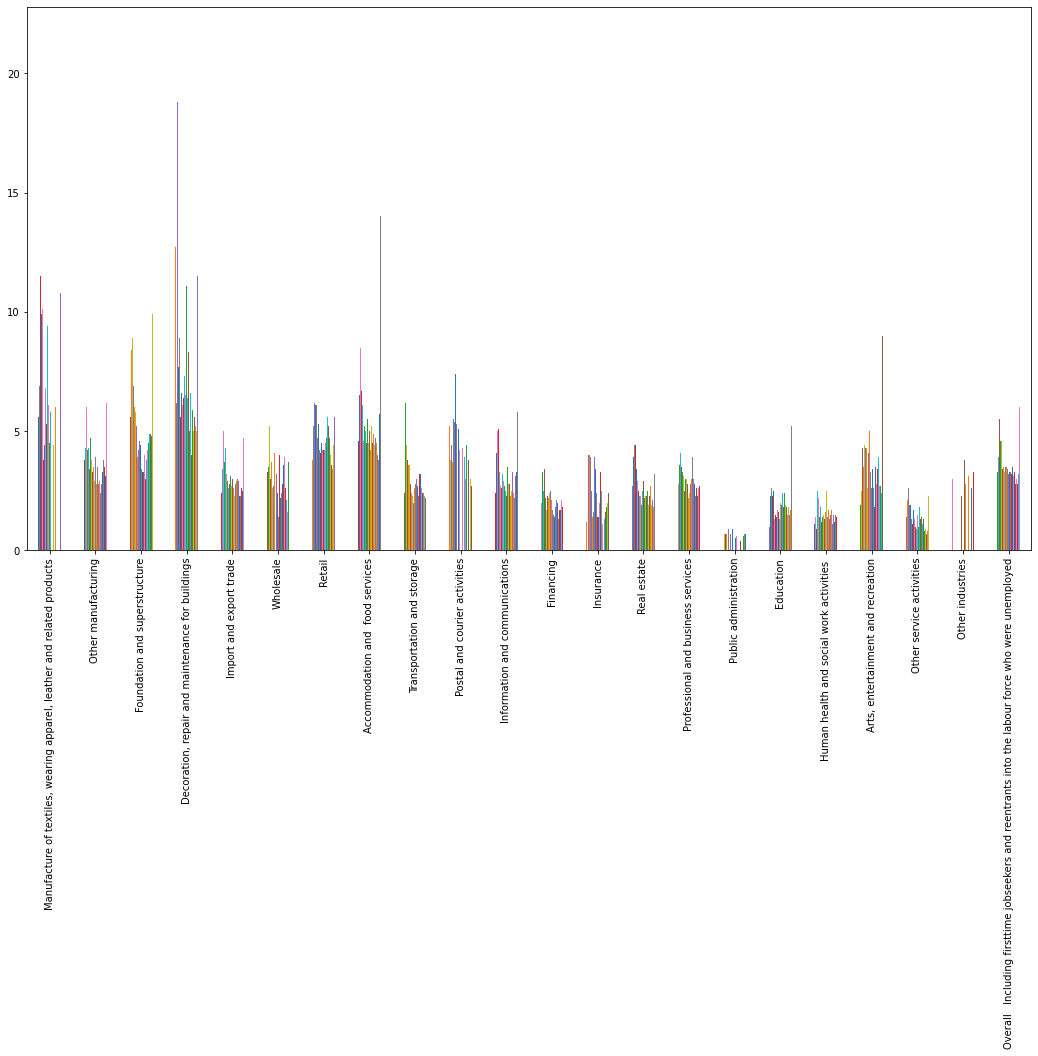

In [159]:
ax = df_T.plot.bar(figsize=(18,10), legend = None)

In [183]:
peak_df

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Insurance,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed
11,11/2008 - 1/2009,9.2,4.9,6.4,9.7,4.0,2.6,5.5,6.5,4.5,...,NaN,3.9,3.1,0.7,2.3,1.5,4.0,1.8,3.0,4.3
12,12/2008 - 2/2009,7.9,5.5,8.4,14.3,4.3,3.3,5.5,6.9,5.4,...,2.5,4.0,3.3,0.9,2.0,1.1,5.0,2.1,2.7,4.7
13,1/2009 - 3/2009,8.9,5.5,9.5,17.4,4.7,3.5,6.1,7.3,6.2,...,3.0,4.1,3.6,0.9,2.1,0.9,4.8,1.9,NaN,5.1
14,2/2009 - 4/2009,11.5,5.8,10.3,21.7,4.8,3.6,6.2,8.1,5.9,...,3.3,4.2,3.9,1.0,1.7,0.9,4.6,1.8,NaN,5.4
15,3/2009 - 5/2009,10.8,5.6,10.3,18.8,4.8,4.2,6.2,8.7,5.4,...,4.0,4.5,4.2,0.7,2.0,1.5,3.4,1.7,2.1,5.4
16,4/2009 - 6/2009,10.3,6.0,10.6,16.7,4.9,4.7,6.5,8.3,4.9,...,3.3,4.8,4.2,0.7,2.0,1.9,4.3,2.1,2.6,5.5
17,5/2009 - 7/2009,9.0,6.0,10.3,14.4,5.0,5.1,6.4,8.5,4.8,...,3.9,4.9,4.2,NaN,2.7,2.3,3.8,2.5,3.2,5.8
18,6/2009 - 8/2009,9.6,5.6,9.5,12.8,5.0,5.6,6.8,8.6,4.7,...,3.5,4.4,4.3,NaN,2.6,2.7,4.3,2.6,2.9,5.9
19,7/2009 - 9/2009,10.2,5.1,8.9,10.8,4.8,5.2,6.7,8.4,4.4,...,3.9,4.3,4.2,NaN,3.1,2.6,3.8,2.3,2.6,5.7
20,8/2009 - 10/2009,9.6,4.7,7.6,8.5,4.7,4.6,6.8,7.7,4.0,...,3.3,3.9,4.1,NaN,3.1,2.5,3.5,1.9,NaN,5.2


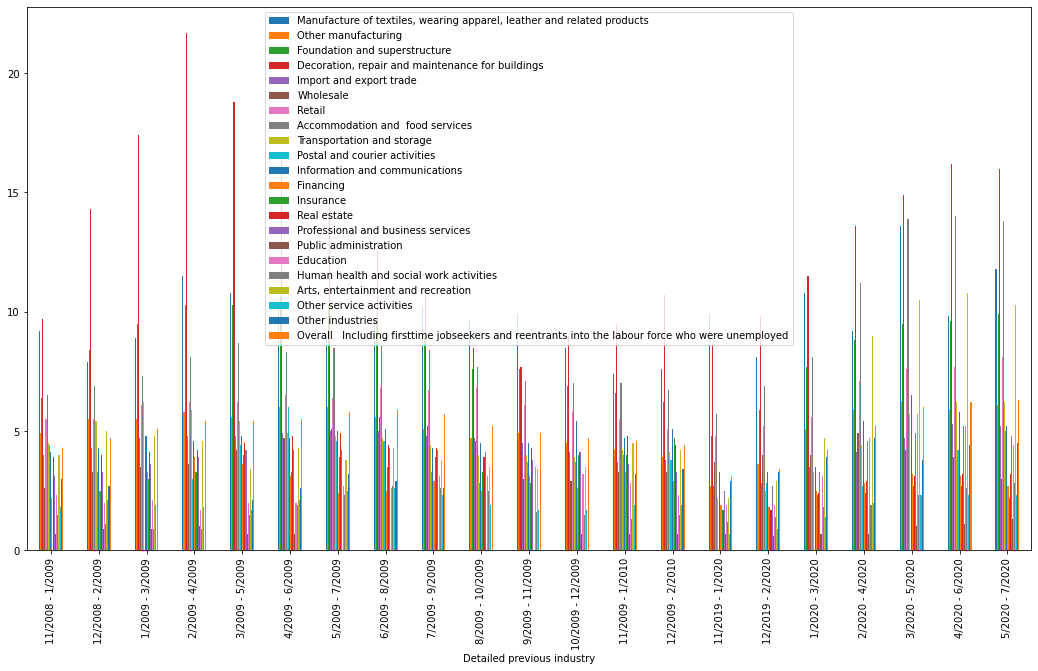

In [130]:
ax = peak_df.plot.bar(x='Detailed previous industry', figsize=(18,10))

In [160]:
peakdf_T = peak_df.T

In [161]:
peakdf_T

,11,12,13,14,15,16,17,18,19,20,...,22,23,24,143,144,145,146,147,148,149
Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,...,10/2009 - 12/2009,11/2009 - 1/2010,12/2009 - 2/2010,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,...,8.5,7.4,7.6,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,...,4.5,4.2,3.9,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,...,6.9,6.6,6.2,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,...,9,9.5,10.7,8.7,9.8,11.5,13.6,14.9,16.2,16
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,...,4.1,3.7,3.8,2.7,2.8,3.5,4.1,4.7,5.3,5.2
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,...,2.9,3.3,3.3,3.7,4,4,4.9,4.2,3.9,3
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,...,5.8,5.5,5.1,4.8,5.2,5.6,7.1,7.6,7.7,8.1
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,...,7,7,6.7,5.7,6.9,8.1,11.2,13.9,14,13.8
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,...,3.9,4.2,4.1,2.2,2.5,3.3,4.4,5.7,6.2,6.2


In [164]:
peakdf_T.columns = peakdf_T.iloc[0]

In [165]:
peakdf_T.drop(peakdf_T.index[0], inplace = True)

In [166]:
peakdf_T

Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,...,10/2009 - 12/2009,11/2009 - 1/2010,12/2009 - 2/2010,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,...,8.5,7.4,7.6,9.9,8.1,10.8,9.2,13.6,9.8,11.8
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,...,4.5,4.2,3.9,2.7,3.6,5.1,5.9,6.2,5.9,6.1
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,...,6.9,6.6,6.2,4.8,5.9,7.7,8.8,9.5,9.6,9.9
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,...,9,9.5,10.7,8.7,9.8,11.5,13.6,14.9,16.2,16
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,...,4.1,3.7,3.8,2.7,2.8,3.5,4.1,4.7,5.3,5.2
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,...,2.9,3.3,3.3,3.7,4,4,4.9,4.2,3.9,3
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,...,5.8,5.5,5.1,4.8,5.2,5.6,7.1,7.6,7.7,8.1
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,...,7,7,6.7,5.7,6.9,8.1,11.2,13.9,14,13.8
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,...,3.9,4.2,4.1,2.2,2.5,3.3,4.4,5.7,6.2,6.2
Postal and courier activities,4.4,3.3,NaN,3,4.4,6,4.6,4.6,3.3,2.8,...,3.7,4,3.8,NaN,2.8,NaN,2.7,NaN,4.2,5


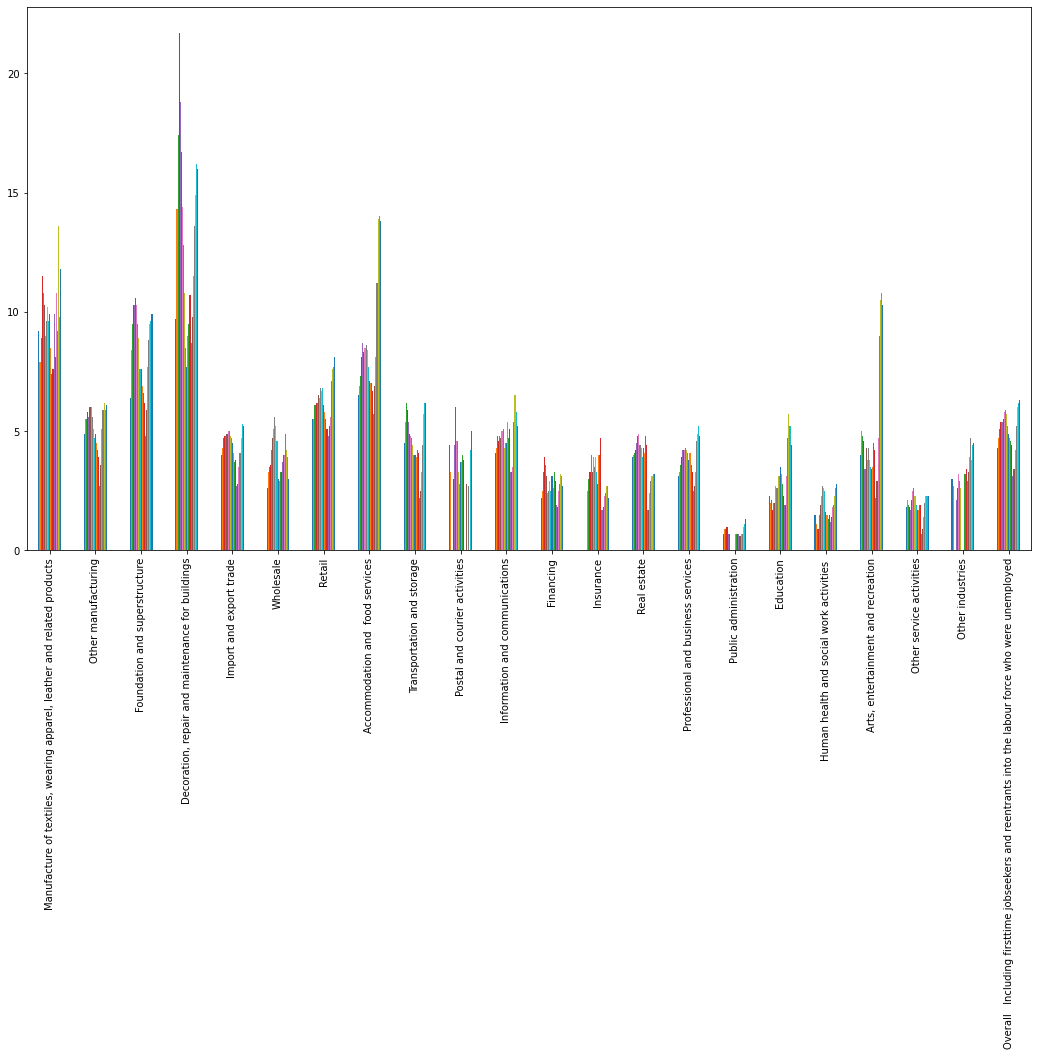

In [167]:
ax = peakdf_T.plot.bar(legend = None, figsize=(18,10))

In [187]:
search_values = ['2009']

peak2009_df = peak_df[peak_df['Detailed previous industry'].str.contains('|'.join(search_values),case=False)]

In [188]:
peak2009_df

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Insurance,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed
11,11/2008 - 1/2009,9.2,4.9,6.4,9.7,4.0,2.6,5.5,6.5,4.5,...,NaN,3.9,3.1,0.7,2.3,1.5,4.0,1.8,3.0,4.3
12,12/2008 - 2/2009,7.9,5.5,8.4,14.3,4.3,3.3,5.5,6.9,5.4,...,2.5,4.0,3.3,0.9,2.0,1.1,5.0,2.1,2.7,4.7
13,1/2009 - 3/2009,8.9,5.5,9.5,17.4,4.7,3.5,6.1,7.3,6.2,...,3.0,4.1,3.6,0.9,2.1,0.9,4.8,1.9,NaN,5.1
14,2/2009 - 4/2009,11.5,5.8,10.3,21.7,4.8,3.6,6.2,8.1,5.9,...,3.3,4.2,3.9,1.0,1.7,0.9,4.6,1.8,NaN,5.4
15,3/2009 - 5/2009,10.8,5.6,10.3,18.8,4.8,4.2,6.2,8.7,5.4,...,4.0,4.5,4.2,0.7,2.0,1.5,3.4,1.7,2.1,5.4
16,4/2009 - 6/2009,10.3,6.0,10.6,16.7,4.9,4.7,6.5,8.3,4.9,...,3.3,4.8,4.2,0.7,2.0,1.9,4.3,2.1,2.6,5.5
17,5/2009 - 7/2009,9.0,6.0,10.3,14.4,5.0,5.1,6.4,8.5,4.8,...,3.9,4.9,4.2,NaN,2.7,2.3,3.8,2.5,3.2,5.8
18,6/2009 - 8/2009,9.6,5.6,9.5,12.8,5.0,5.6,6.8,8.6,4.7,...,3.5,4.4,4.3,NaN,2.6,2.7,4.3,2.6,2.9,5.9
19,7/2009 - 9/2009,10.2,5.1,8.9,10.8,4.8,5.2,6.7,8.4,4.4,...,3.9,4.3,4.2,NaN,3.1,2.6,3.8,2.3,2.6,5.7
20,8/2009 - 10/2009,9.6,4.7,7.6,8.5,4.7,4.6,6.8,7.7,4.0,...,3.3,3.9,4.1,NaN,3.1,2.5,3.5,1.9,NaN,5.2


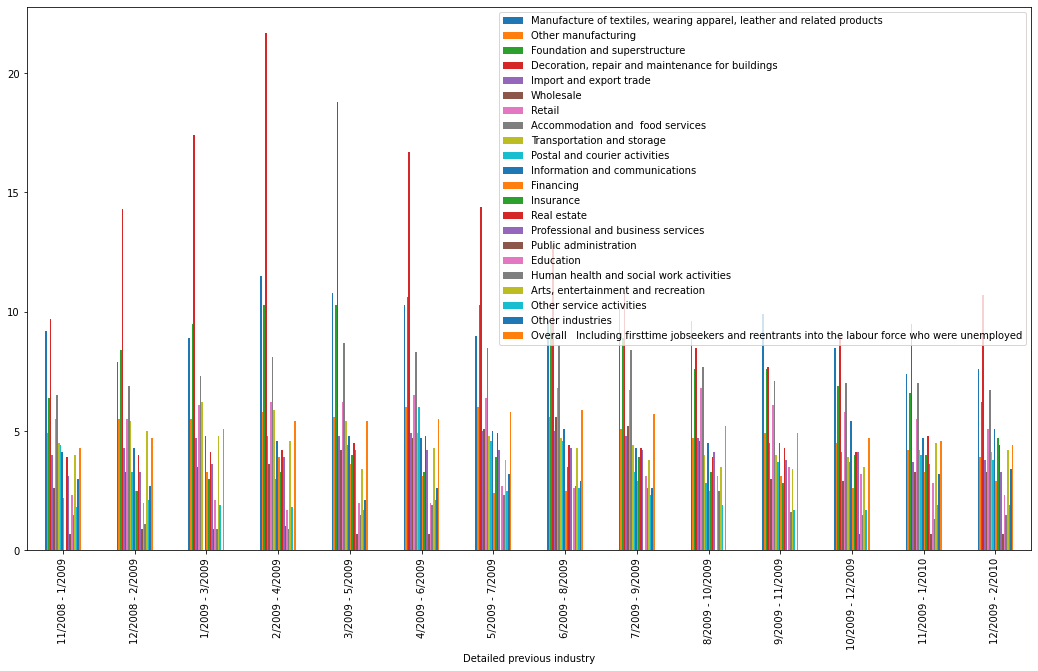

In [190]:
ax = peak2009_df.plot.bar(x = 'Detailed previous industry',figsize=(18,10))

In [191]:
peak2009_df_T = peak2009_df.T

In [192]:
peak2009_df_T

,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,9/2009 - 11/2009,10/2009 - 12/2009,11/2009 - 1/2010,12/2009 - 2/2010
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,9.9,8.5,7.4,7.6
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,4.9,4.5,4.2,3.9
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,7.6,6.9,6.6,6.2
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,7.7,9,9.5,10.7
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,4.5,4.1,3.7,3.8
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,3,2.9,3.3,3.3
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,6.1,5.8,5.5,5.1
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,7.1,7,7,6.7
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,4,3.9,4.2,4.1


In [193]:
peak2009_df_T.columns = peak2009_df_T.iloc[0]
peak2009_df_T.drop(peak2009_df_T.index[0], inplace = True)

In [194]:
peak2009_df_T

Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,9/2009 - 11/2009,10/2009 - 12/2009,11/2009 - 1/2010,12/2009 - 2/2010
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,9.9,8.5,7.4,7.6
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,4.9,4.5,4.2,3.9
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,7.6,6.9,6.6,6.2
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,7.7,9,9.5,10.7
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,4.5,4.1,3.7,3.8
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,3,2.9,3.3,3.3
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,6.1,5.8,5.5,5.1
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,7.1,7,7,6.7
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,4,3.9,4.2,4.1
Postal and courier activities,4.4,3.3,NaN,3,4.4,6,4.6,4.6,3.3,2.8,3.7,3.7,4,3.8


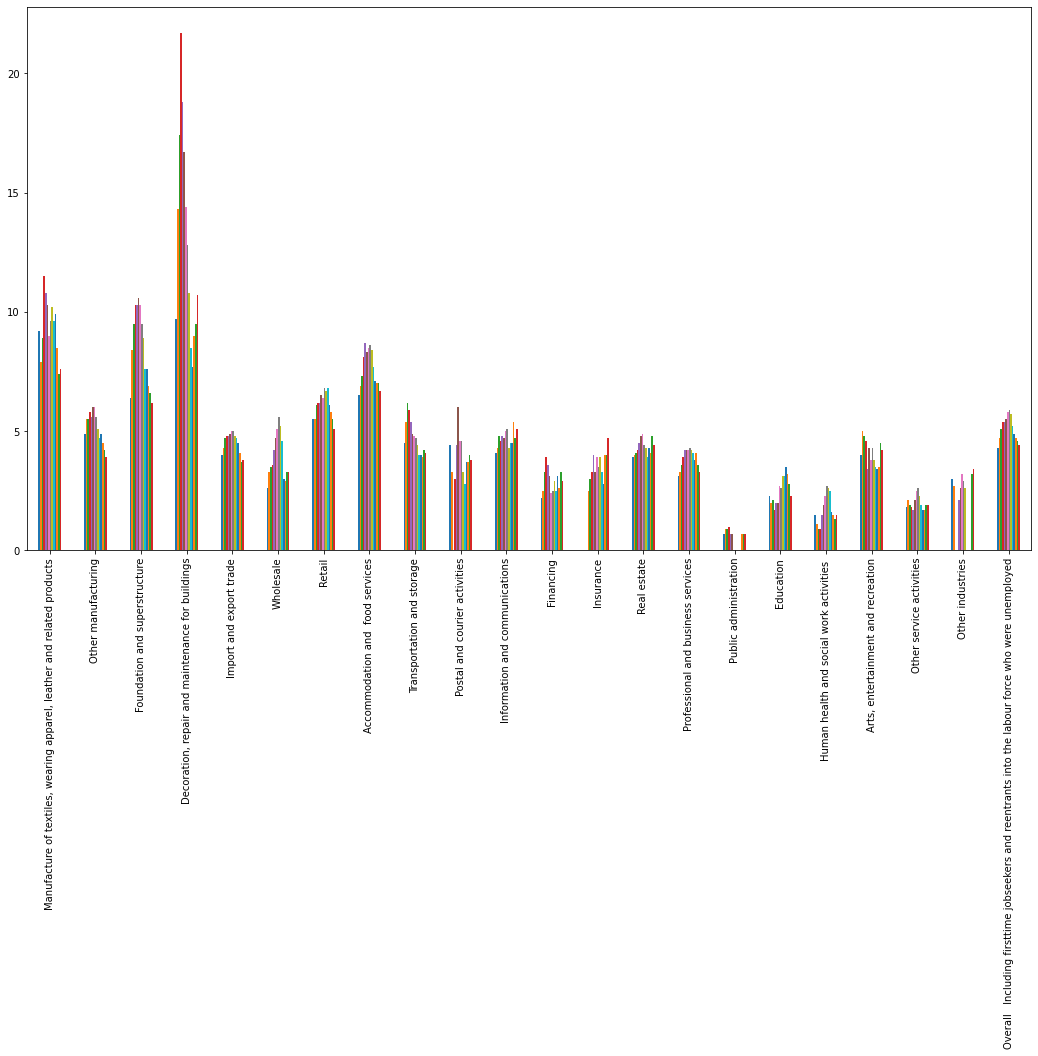

In [195]:
ax = peak2009_df_T.plot.bar(legend = None, figsize=(18,10))

In [196]:
search_values = ['2020']

peak2020_df = peak_df[peak_df['Detailed previous industry'].str.contains('|'.join(search_values),case=False)]

In [197]:
peak2020_df_T = peak2020_df.T

In [199]:
peak2020_df_T.columns = peak2020_df_T.iloc[0]
peak2020_df_T.drop(peak2020_df_T.index[0], inplace = True)

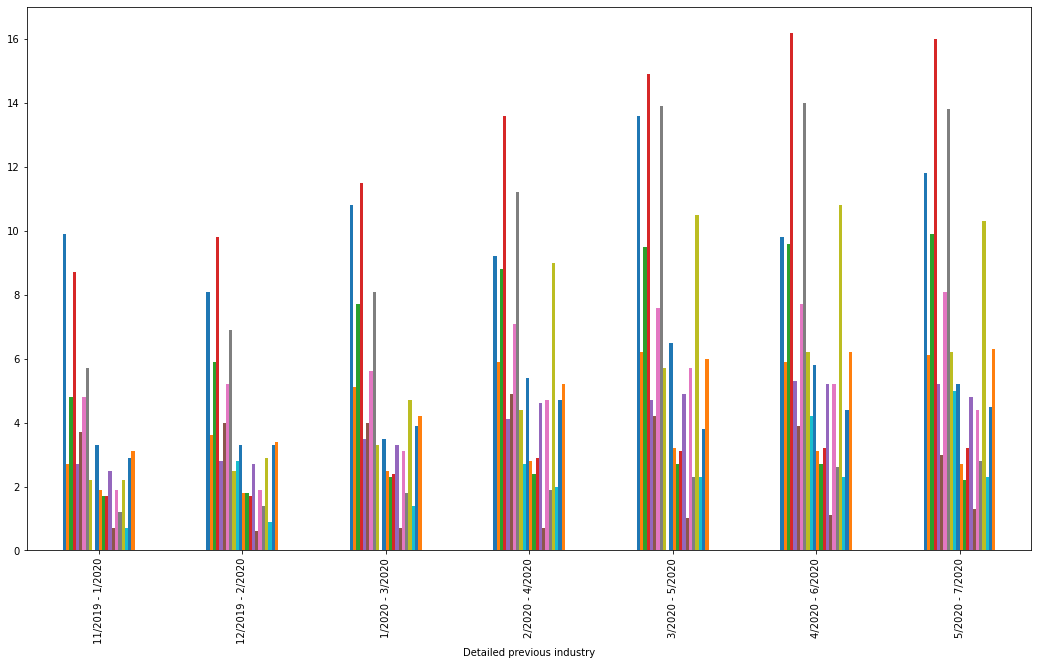

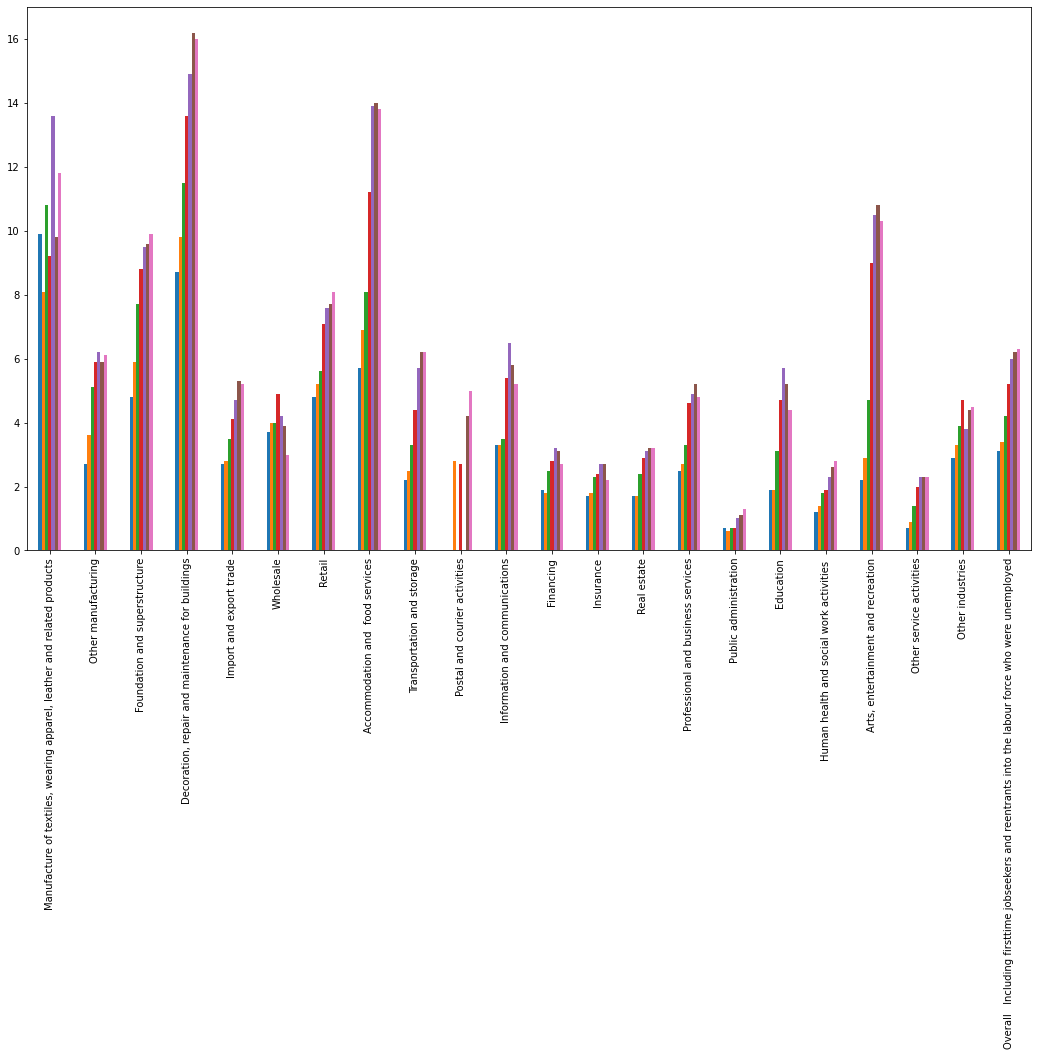

In [204]:
ax = peak2020_df.plot.bar(x = 'Detailed previous industry',legend = None, figsize=(18,10))
ax = peak2020_df_T.plot.bar(legend = None, figsize=(18,10))

### Data set with Mean values

In [407]:
dfMean = df

In [408]:
dfMean['mean'] = dfMean.mean(axis=1)

In [409]:
dfMean

,Period,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed,mean,k_means
1,2008,5.6,3.5,6.3,11.5,2.3,2.5,3.9,5.3,3.2,...,3.2,0.5,1.5,1.1,2.3,1.4,0.0,3.2,3.432937,10
2,2008,5.8,3.5,7.0,12.7,2.5,3.4,3.8,4.8,3.2,...,2.9,0.0,1.4,1.3,1.2,1.5,0.0,3.3,3.527292,10
3,2008,5.9,4.1,6.1,10.9,2.4,3.3,4.3,5.3,2.9,...,2.8,0.0,1.3,1.4,1.9,1.8,0.0,3.3,3.527292,10
4,2008,5.8,3.8,6.5,11.5,2.4,2.7,4.4,4.6,2.7,...,2.4,0.0,1.0,1.4,1.4,1.3,0.0,3.3,3.369792,10
5,2008,5.9,3.8,5.8,10.1,2.1,3.0,4.6,4.6,2.2,...,2.6,0.5,1.0,1.4,1.7,1.4,0.0,3.4,3.249603,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020,10.8,5.1,7.7,11.5,3.5,4.0,5.6,8.1,3.3,...,3.3,0.7,3.1,1.8,4.7,1.4,3.9,4.2,4.535317,11
146,2020,9.2,5.9,8.8,13.6,4.1,4.9,7.1,11.2,4.4,...,4.6,0.7,4.7,1.9,9.0,2.0,4.7,5.2,5.357197,5
147,2020,13.6,6.2,9.5,14.9,4.7,4.2,7.6,13.9,5.7,...,4.9,1.0,5.7,2.3,10.5,2.3,3.8,6.0,5.983333,5
148,2020,9.8,5.9,9.6,16.2,5.3,3.9,7.7,14.0,6.2,...,5.2,1.1,5.2,2.6,10.8,2.3,4.4,6.2,6.106439,5


In [410]:
dfMean_T = dfMean.T

In [411]:
dfMean_T.columns = dfMean_T.iloc[0]
dfMean_T.drop(dfMean_T.index[0], inplace = True)

In [425]:
dfMean_T['mean'] = dfMean_T.mean(axis=1)

In [413]:
dfMean_T

Period,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2019,2019,2019,2019,2020,2020,2020,2020,2020,mean
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8,4.844295
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1,3.546980
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9,5.094631
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16,7.646309
Import and export trade,2.3,2.5,2.4,2.4,2.1,2.1,2.3,2.7,3.1,3.4,...,2.5,2.4,2.7,2.8,3.5,4.1,4.7,5.3,5.2,3.061745
Wholesale,2.5,3.4,3.3,2.7,3,3.3,4.5,3.3,2.5,1.5,...,3.1,3.2,3.7,4,4,4.9,4.2,3.9,3,2.963758
Retail,3.9,3.8,4.3,4.4,4.6,4.3,4.6,5.2,5.7,5.4,...,4.8,4.7,4.8,5.2,5.6,7.1,7.6,7.7,8.1,4.769128
Accommodation and food services,5.3,4.8,5.3,4.6,4.6,5,5.6,5.7,5.9,6.2,...,5.7,5.7,5.7,6.9,8.1,11.2,13.9,14,13.8,5.393960
Transportation and storage,3.2,3.2,2.9,2.7,2.2,2.4,2.9,3.5,3.7,3.8,...,2.5,2.4,2.2,2.5,3.3,4.4,5.7,6.2,6.2,3.030872
Postal and courier activities,4.3,5.2,5.5,3.8,2.4,0,2.6,3.8,3.8,5.4,...,2.6,0,0,2.8,0,2.7,0,4.2,5,2.891275


In [252]:
dfMean_T.columns

Index(['1/2008 - 3/2008', '2/2008 - 4/2008', '3/2008 - 5/2008',
       '4/2008 - 6/2008', '5/2008 - 7/2008', '6/2008 - 8/2008',
       '7/2008 - 9/2008', '8/2008 - 10/2008', '9/2008 - 11/2008',
       '10/2008 - 12/2008',
       ...
       '9/2019 - 11/2019', '10/2019 - 12/2019', '11/2019 - 1/2020',
       '12/2019 - 2/2020', '1/2020 - 3/2020', '2/2020 - 4/2020',
       '3/2020 - 5/2020', '4/2020 - 6/2020', '5/2020 - 7/2020', 'mean'],
      dtype='object', name='Detailed previous industry', length=150)

In [253]:
dfMean_T['Industry'] = dfMean_T.index

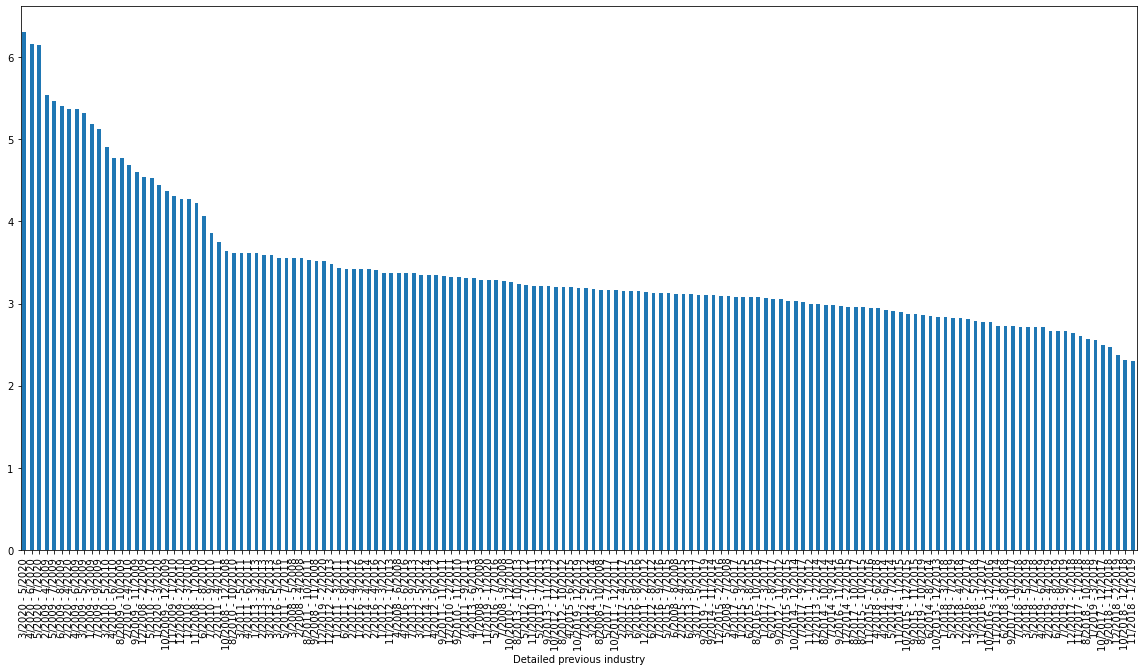

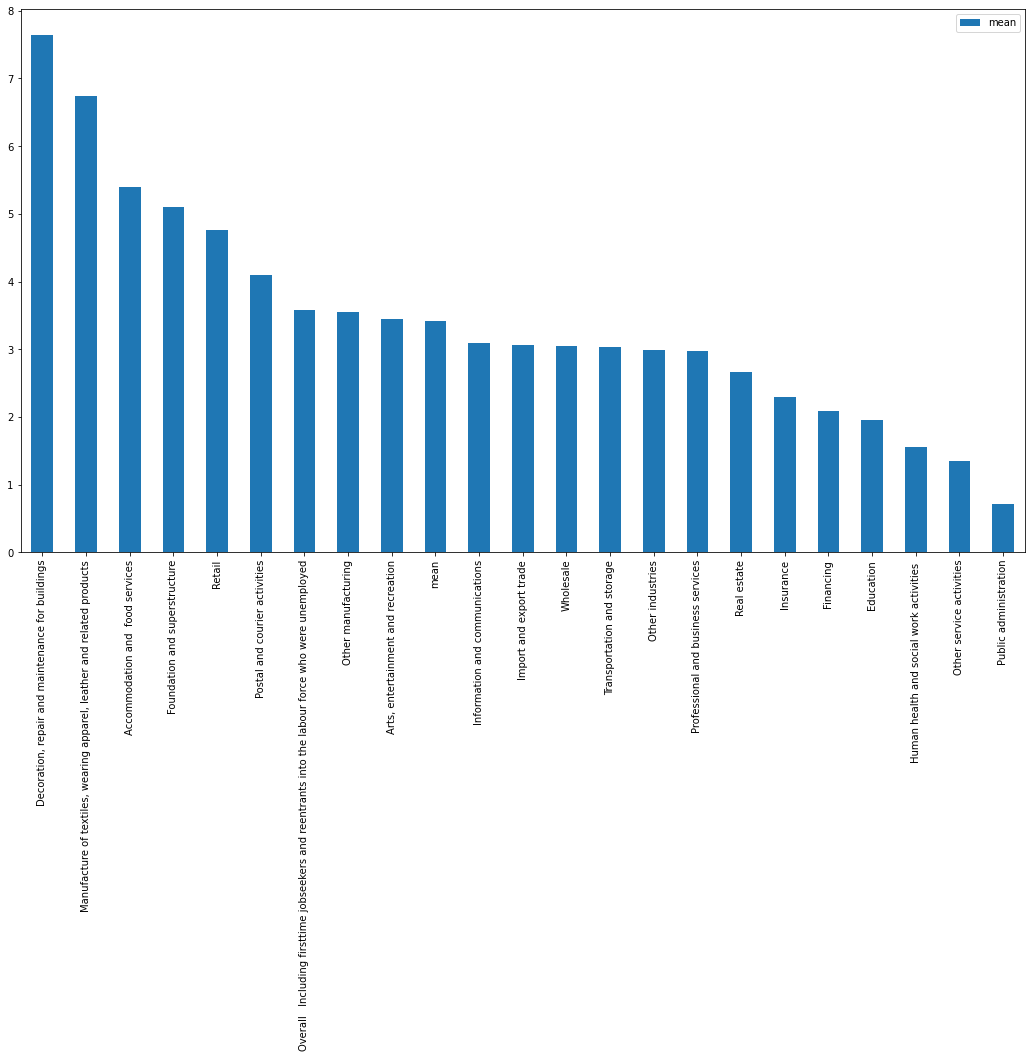

In [258]:
ax = dfMean.sort_values('mean', ascending = False).plot.bar(x = 'Detailed previous industry', y ='mean',legend = None, figsize=(20,10))
ax = dfMean_T.sort_values('mean', ascending = False).plot.bar(y='mean', figsize=(18,10))

### Peak data sets with mean

In [260]:
peakdf_mean = peak_df

In [261]:
peakdf_mean['mean'] = peakdf_mean.mean(axis=1)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [262]:
peakdf_mean

,Detailed previous industry,"Manufacture of textiles, wearing apparel, leather and related products",Other manufacturing,Foundation and superstructure,"Decoration, repair and maintenance for buildings",Import and export trade,Wholesale,Retail,Accommodation and food services,Transportation and storage,...,Real estate,Professional and business services,Public administration,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Other industries,Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed,mean
11,11/2008 - 1/2009,9.2,4.9,6.4,9.7,4.0,2.6,5.5,6.5,4.5,...,3.9,3.1,0.7,2.3,1.5,4.0,1.8,3.0,4.3,4.219048
12,12/2008 - 2/2009,7.9,5.5,8.4,14.3,4.3,3.3,5.5,6.9,5.4,...,4.0,3.3,0.9,2.0,1.1,5.0,2.1,2.7,4.7,4.540909
13,1/2009 - 3/2009,8.9,5.5,9.5,17.4,4.7,3.5,6.1,7.3,6.2,...,4.1,3.6,0.9,2.1,0.9,4.8,1.9,NaN,5.1,5.180000
14,2/2009 - 4/2009,11.5,5.8,10.3,21.7,4.8,3.6,6.2,8.1,5.9,...,4.2,3.9,1.0,1.7,0.9,4.6,1.8,NaN,5.4,5.533333
15,3/2009 - 5/2009,10.8,5.6,10.3,18.8,4.8,4.2,6.2,8.7,5.4,...,4.5,4.2,0.7,2.0,1.5,3.4,1.7,2.1,5.4,5.322727
16,4/2009 - 6/2009,10.3,6.0,10.6,16.7,4.9,4.7,6.5,8.3,4.9,...,4.8,4.2,0.7,2.0,1.9,4.3,2.1,2.6,5.5,5.368182
17,5/2009 - 7/2009,9.0,6.0,10.3,14.4,5.0,5.1,6.4,8.5,4.8,...,4.9,4.2,NaN,2.7,2.3,3.8,2.5,3.2,5.8,5.466667
18,6/2009 - 8/2009,9.6,5.6,9.5,12.8,5.0,5.6,6.8,8.6,4.7,...,4.4,4.3,NaN,2.6,2.7,4.3,2.6,2.9,5.9,5.409524
19,7/2009 - 9/2009,10.2,5.1,8.9,10.8,4.8,5.2,6.7,8.4,4.4,...,4.3,4.2,NaN,3.1,2.6,3.8,2.3,2.6,5.7,5.119048
20,8/2009 - 10/2009,9.6,4.7,7.6,8.5,4.7,4.6,6.8,7.7,4.0,...,3.9,4.1,NaN,3.1,2.5,3.5,1.9,NaN,5.2,4.775000


In [263]:
peakdf_mean_T = peakdf_mean.T
peakdf_mean_T.columns = peakdf_mean_T.iloc[0]
peakdf_mean_T.drop(peakdf_mean_T.index[0], inplace = True)
peakdf_mean_T['mean'] = peakdf_mean_T.mean(axis=1)

In [264]:
peakdf_mean_T

Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,...,11/2009 - 1/2010,12/2009 - 2/2010,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020,mean
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,...,7.4,7.6,9.9,8.1,10.8,9.2,13.6,9.8,11.8,9.695238
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,...,4.2,3.9,2.7,3.6,5.1,5.9,6.2,5.9,6.1,5.128571
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,...,6.6,6.2,4.8,5.9,7.7,8.8,9.5,9.6,9.9,8.347619
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,...,9.5,10.7,8.7,9.8,11.5,13.6,14.9,16.2,16,12.985714
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,...,3.7,3.8,2.7,2.8,3.5,4.1,4.7,5.3,5.2,4.352381
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,...,3.3,3.3,3.7,4,4,4.9,4.2,3.9,3,3.933333
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,...,5.5,5.1,4.8,5.2,5.6,7.1,7.6,7.7,8.1,6.252381
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,...,7,6.7,5.7,6.9,8.1,11.2,13.9,14,13.8,8.590476
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,...,4.2,4.1,2.2,2.5,3.3,4.4,5.7,6.2,6.2,4.614286
Postal and courier activities,4.4,3.3,NaN,3,4.4,6,4.6,4.6,3.3,2.8,...,4,3.8,NaN,2.8,NaN,2.7,NaN,4.2,5,3.900000


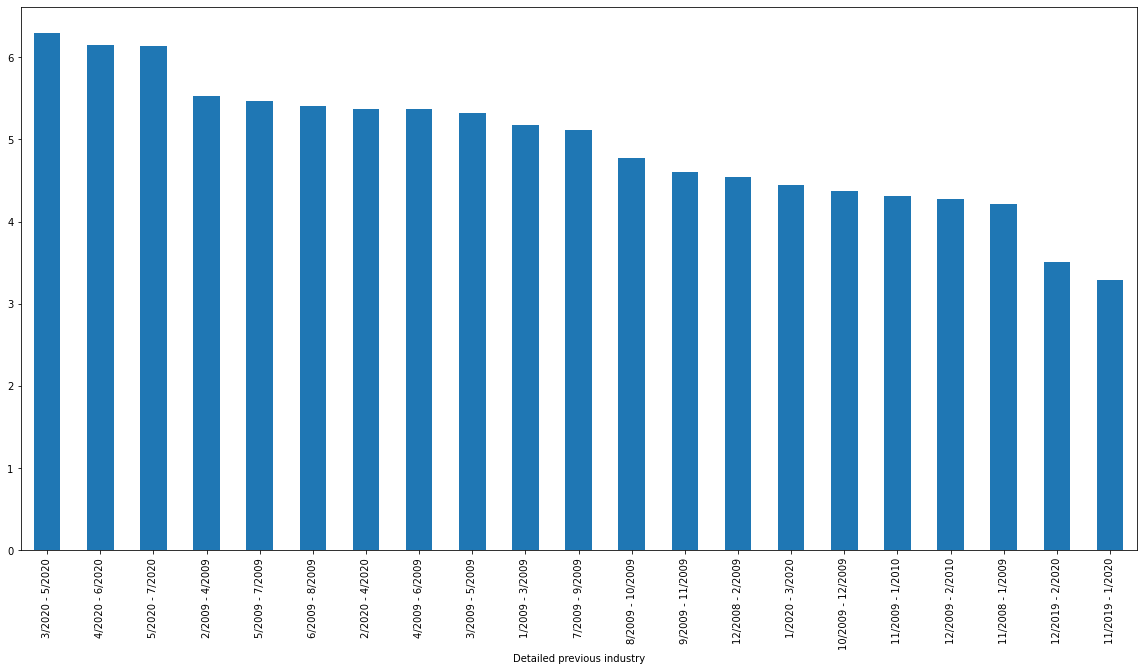

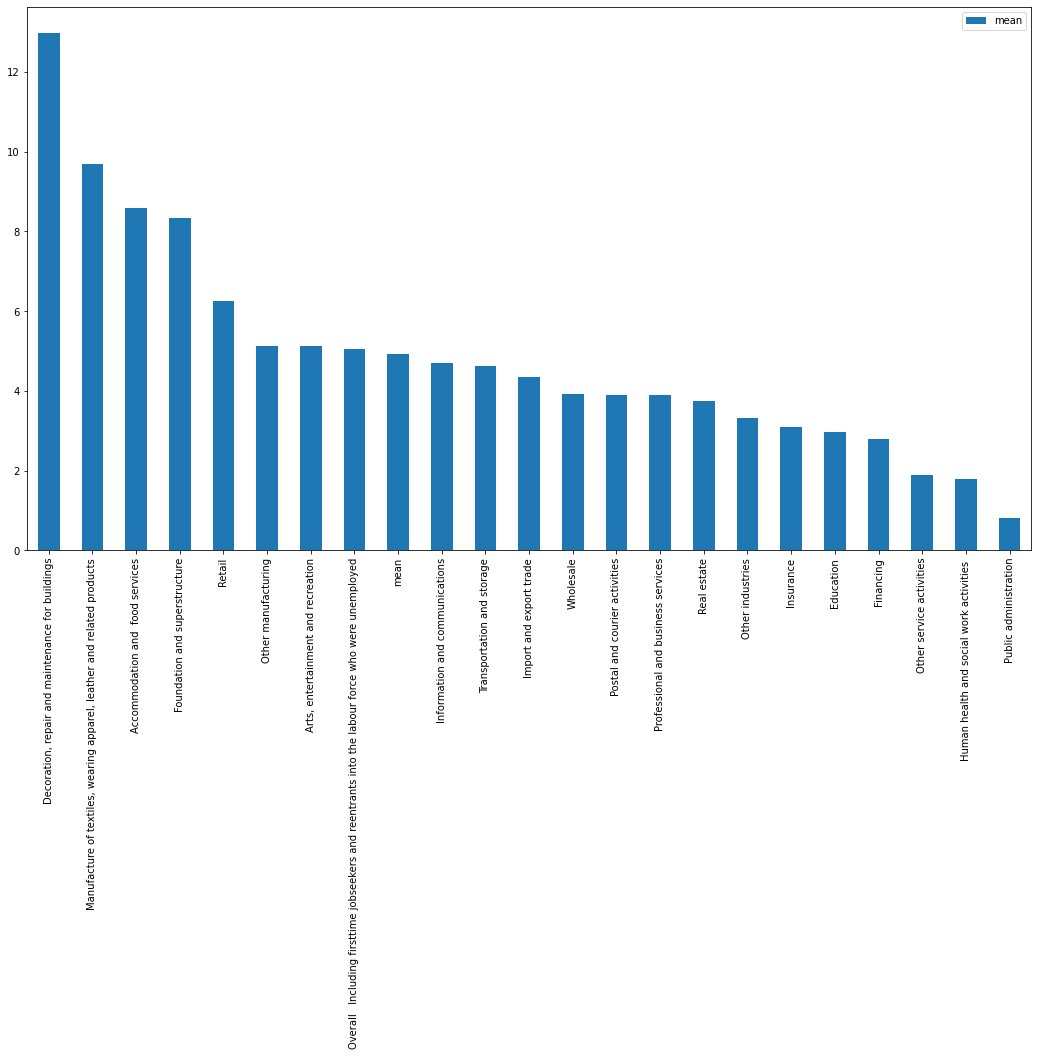

In [265]:
ax = peakdf_mean.sort_values('mean', ascending = False).plot.bar(x = 'Detailed previous industry', y ='mean',legend = None, figsize=(20,10))
ax = peakdf_mean_T.sort_values('mean', ascending = False).plot.bar(y='mean', figsize=(18,10))

### K-Means Clustering

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [278]:
# functions for K-Means

In [279]:
def KMeansElbow (r, data):
    distortions = []
    K = range(1,r)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [298]:
def KMeansModel (n, data):
    kmeanModel = KMeans(n_clusters=n)
    kmeanModel.fit(data)
    data['k_means']=kmeanModel.predict(data)

In [299]:
def KMeansPlot (data, x, y, c_d):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(data[x], data[y], c=data[c_d])
    axes[1].scatter(data[x], data[y], c=data['k_means'], cmap=plt.cm.Set1)

In [300]:
def KMeansCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['k_means'] == cond ] [column])
    return cluster

In [301]:
##KMeansElbow (8, peak1_df)
##KMeansModel(4, peak1_df)
##KMeansPlot(peak1_df, 'Manufacturing ', 'Construction ','Period')
##KMeansCluster (peak1_df, 0, 'Period')

## Clustering of specific industries from Yr 2008 to Yr 2020

In [406]:
dfMean.shape

(149, 25)

In [288]:
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2008.*$)', '2008')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2009.*$)', '2009')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2010.*$)', '2010')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2011.*$)', '2011')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2012.*$)', '2012')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2013.*$)', '2013')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2014.*$)', '2014')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2015.*$)', '2015')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2016.*$)', '2016')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2017.*$)', '2017')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2018.*$)', '2018')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2019.*$)', '2019')
dfMean['Detailed previous industry'] = dfMean['Detailed previous industry'].str.replace(r'(^.*2020.*$)', '2020')

In [293]:
dfMean.fillna(0, inplace = True)

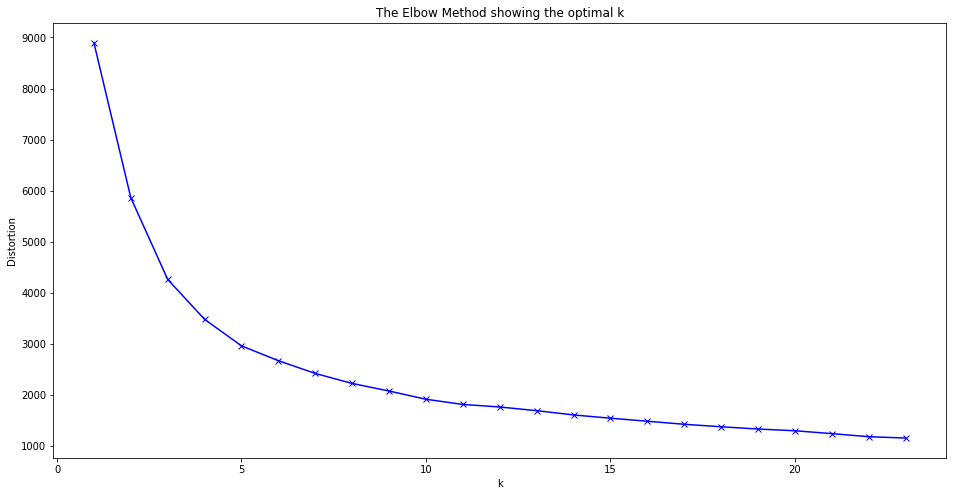

In [294]:
KMeansElbow (24, dfMean)

In [303]:
KMeansModel(12, dfMean)

In [307]:
for x in range(0, 12):
    KMeansCluster (dfMean, x, 'Detailed previous industry')

In [318]:
dfMean.rename(columns={'Detailed previous industry': 'Period'},inplace=True)

cluster = pd.DataFrame(dfMean[dfMean['k_means'] == 0 ] ['Period', 'mean'])
cluster.drop_duplicates()

,Period
70,2013
76,2014
86,2015
104,2016
109,2017


In [354]:
KMeansCluster (dfMean, 1, 'Period').drop_duplicates()

,Period
8,2008
34,2010
40,2011
59,2012


In [355]:
KMeansCluster (dfMean, 2, 'Period').drop_duplicates()

,Period
11,2008
18,2009
25,2010


In [356]:
KMeansCluster (dfMean, 3, 'Period').drop_duplicates()

,Period
115,2017
121,2018
133,2019


In [316]:
for x in range(0, 12):
    cluster = pd.DataFrame(dfMean[dfMean['k_means'] == x ] ['Period'])
    cluster.drop_duplicates()
    
cluster

,Period
111,2017
141,2019
142,2019
143,2019
144,2019
145,2020


In [414]:
dfMean_T

Period,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2019,2019,2019,2019,2020,2020,2020,2020,2020,mean
"Manufacture of textiles, wearing apparel, leather and related products",5.6,5.8,5.9,5.8,5.9,6.7,7.9,6.9,8,7.2,...,8.1,9.1,9.9,8.1,10.8,9.2,13.6,9.8,11.8,4.844295
Other manufacturing,3.5,3.5,4.1,3.8,3.8,3.1,3.7,3.3,3.9,4.3,...,3.1,2.7,2.7,3.6,5.1,5.9,6.2,5.9,6.1,3.546980
Foundation and superstructure,6.3,7,6.1,6.5,5.8,5.6,5.1,5,5.3,5.4,...,4.5,4.7,4.8,5.9,7.7,8.8,9.5,9.6,9.9,5.094631
"Decoration, repair and maintenance for buildings",11.5,12.7,10.9,11.5,10.1,8.6,6.4,6.2,7.1,8,...,7,8.6,8.7,9.8,11.5,13.6,14.9,16.2,16,7.646309
Import and export trade,2.3,2.5,2.4,2.4,2.1,2.1,2.3,2.7,3.1,3.4,...,2.5,2.4,2.7,2.8,3.5,4.1,4.7,5.3,5.2,3.061745
Wholesale,2.5,3.4,3.3,2.7,3,3.3,4.5,3.3,2.5,1.5,...,3.1,3.2,3.7,4,4,4.9,4.2,3.9,3,2.963758
Retail,3.9,3.8,4.3,4.4,4.6,4.3,4.6,5.2,5.7,5.4,...,4.8,4.7,4.8,5.2,5.6,7.1,7.6,7.7,8.1,4.769128
Accommodation and food services,5.3,4.8,5.3,4.6,4.6,5,5.6,5.7,5.9,6.2,...,5.7,5.7,5.7,6.9,8.1,11.2,13.9,14,13.8,5.393960
Transportation and storage,3.2,3.2,2.9,2.7,2.2,2.4,2.9,3.5,3.7,3.8,...,2.5,2.4,2.2,2.5,3.3,4.4,5.7,6.2,6.2,3.030872
Postal and courier activities,4.3,5.2,5.5,3.8,2.4,0,2.6,3.8,3.8,5.4,...,2.6,0,0,2.8,0,2.7,0,4.2,5,2.891275


In [415]:
dfMean_T.shape

(24, 150)

In [416]:
dfMean_T.drop(dfMean_T.columns[-1], axis=1, inplace=True)

In [417]:
dfMean_T.fillna(0, inplace = True)

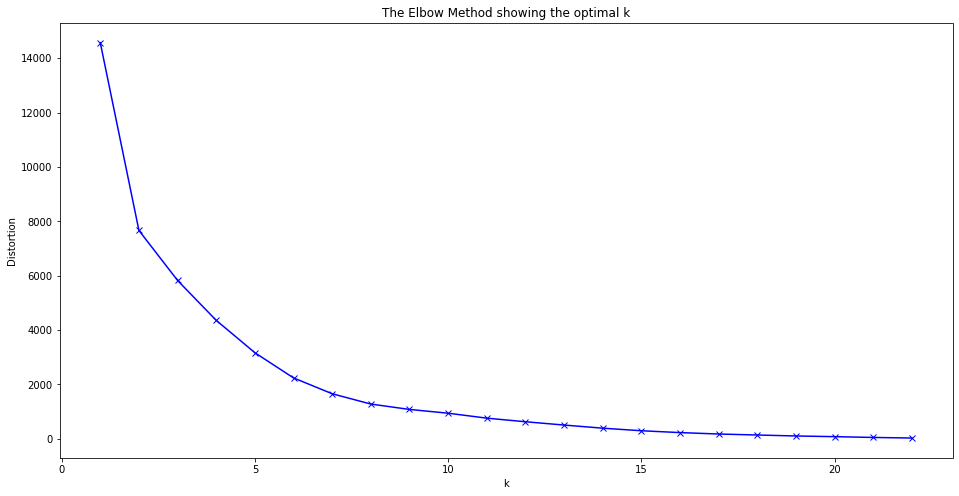

In [418]:
KMeansElbow (23, dfMean_T)

In [419]:
KMeansModel(11, dfMean_T)

In [420]:
dfMean_T.columns

Index(['2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008', '2008',
       '2008',
       ...
       '2019', '2019', '2019', '2019', '2020', '2020', '2020', '2020', '2020',
       'k_means'],
      dtype='object', name='Period', length=150)

In [421]:
dfMean_T

Period,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2019,2019,2019,2019,2020,2020,2020,2020,2020,k_means
"Manufacture of textiles, wearing apparel, leather and related products",5.600000,5.800000,5.900000,5.800000,5.900000,6.70000,7.900000,6.900000,8.000000,7.200000,...,8.100000,9.100000,9.900000,8.100000,10.800000,9.200000,13.600000,9.800000,11.800000,6
Other manufacturing,3.500000,3.500000,4.100000,3.800000,3.800000,3.10000,3.700000,3.300000,3.900000,4.300000,...,3.100000,2.700000,2.700000,3.600000,5.100000,5.900000,6.200000,5.900000,6.100000,4
Foundation and superstructure,6.300000,7.000000,6.100000,6.500000,5.800000,5.60000,5.100000,5.000000,5.300000,5.400000,...,4.500000,4.700000,4.800000,5.900000,7.700000,8.800000,9.500000,9.600000,9.900000,3
"Decoration, repair and maintenance for buildings",11.500000,12.700000,10.900000,11.500000,10.100000,8.60000,6.400000,6.200000,7.100000,8.000000,...,7.000000,8.600000,8.700000,9.800000,11.500000,13.600000,14.900000,16.200000,16.000000,2
Import and export trade,2.300000,2.500000,2.400000,2.400000,2.100000,2.10000,2.300000,2.700000,3.100000,3.400000,...,2.500000,2.400000,2.700000,2.800000,3.500000,4.100000,4.700000,5.300000,5.200000,4
Wholesale,2.500000,3.400000,3.300000,2.700000,3.000000,3.30000,4.500000,3.300000,2.500000,1.500000,...,3.100000,3.200000,3.700000,4.000000,4.000000,4.900000,4.200000,3.900000,3.000000,4
Retail,3.900000,3.800000,4.300000,4.400000,4.600000,4.30000,4.600000,5.200000,5.700000,5.400000,...,4.800000,4.700000,4.800000,5.200000,5.600000,7.100000,7.600000,7.700000,8.100000,10
Accommodation and food services,5.300000,4.800000,5.300000,4.600000,4.600000,5.00000,5.600000,5.700000,5.900000,6.200000,...,5.700000,5.700000,5.700000,6.900000,8.100000,11.200000,13.900000,14.000000,13.800000,10
Transportation and storage,3.200000,3.200000,2.900000,2.700000,2.200000,2.40000,2.900000,3.500000,3.700000,3.800000,...,2.500000,2.400000,2.200000,2.500000,3.300000,4.400000,5.700000,6.200000,6.200000,4
Postal and courier activities,4.300000,5.200000,5.500000,3.800000,2.400000,0.00000,2.600000,3.800000,3.800000,5.400000,...,2.600000,0.000000,0.000000,2.800000,0.000000,2.700000,0.000000,4.200000,5.000000,9


In [426]:
KMeansCluster (dfMean_T, 0, 'mean').drop_duplicates()

,mean
"Arts, entertainment and recreation",3.431333


In [427]:
KMeansCluster (dfMean_T, 1, 'mean').drop_duplicates()

,mean
Financing,2.080667
Insurance,2.150000
Education,1.947333
Human health and social work activities,1.560000
Other service activities,1.352667


In [428]:
KMeansCluster (dfMean_T, 2, 'mean').drop_duplicates()

,mean
"Decoration, repair and maintenance for buildings",7.608667


In [429]:
KMeansCluster (dfMean_T, 3, 'mean').drop_duplicates()

,mean
Foundation and superstructure,5.080667


In [430]:
KMeansCluster (dfMean_T, 4, 'mean').drop_duplicates()

,mean
Other manufacturing,3.550000
Import and export trade,3.068000
Wholesale,2.970667
Transportation and storage,3.037333
Information and communications,3.106000
Real estate,2.669333
Professional and business services,2.987333
Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed,3.578667
mean,3.232069


In [431]:
KMeansCluster (dfMean_T, 5, 'mean').drop_duplicates()

,mean
k_means,4.433333


In [432]:
KMeansCluster (dfMean_T, 6, 'mean').drop_duplicates()

,mean
"Manufacture of textiles, wearing apparel, leather and related products",4.852


In [433]:
KMeansCluster (dfMean_T, 7, 'mean').drop_duplicates()

,mean
Other industries,1.124


In [434]:
KMeansCluster (dfMean_T, 8, 'mean').drop_duplicates()

,mean
Public administration,0.430667


In [435]:
KMeansCluster (dfMean_T, 9, 'mean').drop_duplicates()

,mean
Postal and courier activities,2.932


In [436]:
KMeansCluster (dfMean_T, 10, 'mean').drop_duplicates()

,mean
Retail,4.804000
Accommodation and food services,5.424667


In [437]:
KMeansCluster (dfMean_T, 11, 'mean').drop_duplicates()

,mean


### Pandemic Years (Peak - 2009 & 2020)

In [365]:
peakdf_mean_T

Detailed previous industry,11/2008 - 1/2009,12/2008 - 2/2009,1/2009 - 3/2009,2/2009 - 4/2009,3/2009 - 5/2009,4/2009 - 6/2009,5/2009 - 7/2009,6/2009 - 8/2009,7/2009 - 9/2009,8/2009 - 10/2009,...,11/2009 - 1/2010,12/2009 - 2/2010,11/2019 - 1/2020,12/2019 - 2/2020,1/2020 - 3/2020,2/2020 - 4/2020,3/2020 - 5/2020,4/2020 - 6/2020,5/2020 - 7/2020,mean
"Manufacture of textiles, wearing apparel, leather and related products",9.2,7.9,8.9,11.5,10.8,10.3,9,9.6,10.2,9.6,...,7.4,7.6,9.9,8.1,10.8,9.2,13.6,9.8,11.8,9.695238
Other manufacturing,4.9,5.5,5.5,5.8,5.6,6,6,5.6,5.1,4.7,...,4.2,3.9,2.7,3.6,5.1,5.9,6.2,5.9,6.1,5.128571
Foundation and superstructure,6.4,8.4,9.5,10.3,10.3,10.6,10.3,9.5,8.9,7.6,...,6.6,6.2,4.8,5.9,7.7,8.8,9.5,9.6,9.9,8.347619
"Decoration, repair and maintenance for buildings",9.7,14.3,17.4,21.7,18.8,16.7,14.4,12.8,10.8,8.5,...,9.5,10.7,8.7,9.8,11.5,13.6,14.9,16.2,16,12.985714
Import and export trade,4,4.3,4.7,4.8,4.8,4.9,5,5,4.8,4.7,...,3.7,3.8,2.7,2.8,3.5,4.1,4.7,5.3,5.2,4.352381
Wholesale,2.6,3.3,3.5,3.6,4.2,4.7,5.1,5.6,5.2,4.6,...,3.3,3.3,3.7,4,4,4.9,4.2,3.9,3,3.933333
Retail,5.5,5.5,6.1,6.2,6.2,6.5,6.4,6.8,6.7,6.8,...,5.5,5.1,4.8,5.2,5.6,7.1,7.6,7.7,8.1,6.252381
Accommodation and food services,6.5,6.9,7.3,8.1,8.7,8.3,8.5,8.6,8.4,7.7,...,7,6.7,5.7,6.9,8.1,11.2,13.9,14,13.8,8.590476
Transportation and storage,4.5,5.4,6.2,5.9,5.4,4.9,4.8,4.7,4.4,4,...,4.2,4.1,2.2,2.5,3.3,4.4,5.7,6.2,6.2,4.614286
Postal and courier activities,4.4,3.3,NaN,3,4.4,6,4.6,4.6,3.3,2.8,...,4,3.8,NaN,2.8,NaN,2.7,NaN,4.2,5,3.900000


In [368]:
peakdf_mean_T.fillna(0, inplace = True)
peakdf_mean_T.rename(columns={'Detailed previous industry': 'Industry'},inplace=True)

In [369]:
peakdf_mean_T.shape

(23, 22)

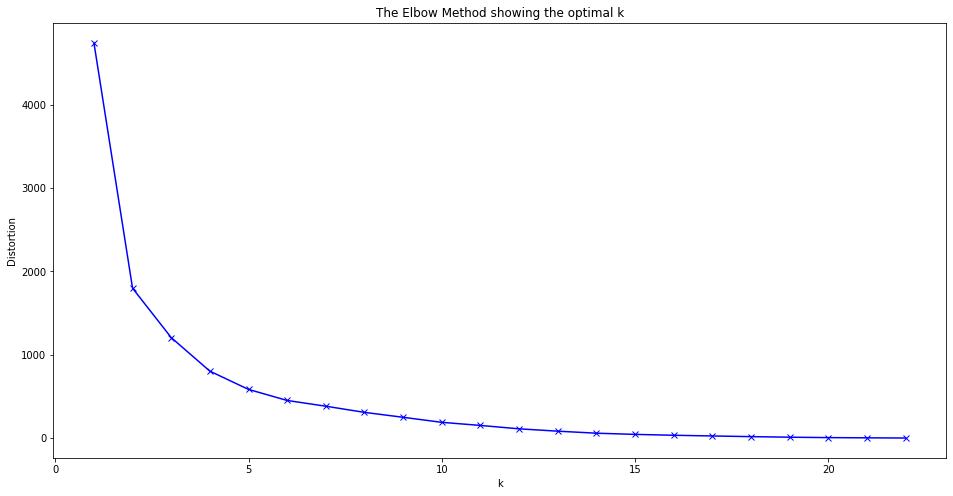

In [373]:
KMeansElbow (23, peakdf_mean_T)

In [392]:
KMeansModel(11, peakdf_mean_T)

In [395]:
KMeansCluster (peakdf_mean_T, 0, 'mean').drop_duplicates()

,mean
Retail,6.252381


In [396]:
KMeansCluster (peakdf_mean_T, 1, 'mean').drop_duplicates()

,mean
Wholesale,3.933333
Financing,2.800000
Insurance,3.100000
Real estate,3.752381
Professional and business services,3.900000


In [397]:
KMeansCluster (peakdf_mean_T, 2, 'mean').drop_duplicates()

,mean
"Decoration, repair and maintenance for buildings",12.985714


In [398]:
KMeansCluster (peakdf_mean_T, 3, 'mean').drop_duplicates()

,mean
Foundation and superstructure,8.347619


In [399]:
KMeansCluster (peakdf_mean_T, 4, 'mean').drop_duplicates()

,mean
Other manufacturing,5.128571
Import and export trade,4.352381
Transportation and storage,4.614286
Information and communications,4.709524
Overall Including firsttime jobseekers and reentrants into the labour force who were unemployed,5.047619
mean,4.938468


In [400]:
KMeansCluster (peakdf_mean_T, 5, 'mean').drop_duplicates()

,mean
Public administration,0.818750
Human health and social work activities,1.800000
Other service activities,1.895238


In [401]:
KMeansCluster (peakdf_mean_T, 6, 'mean').drop_duplicates()

,mean
"Manufacture of textiles, wearing apparel, leather and related products",9.695238


In [402]:
KMeansCluster (peakdf_mean_T, 7, 'mean').drop_duplicates()

,mean
Accommodation and food services,8.590476


In [403]:
KMeansCluster (peakdf_mean_T, 8, 'mean').drop_duplicates()

,mean
"Arts, entertainment and recreation",5.119048


In [404]:
KMeansCluster (peakdf_mean_T, 9, 'mean').drop_duplicates()

,mean
Education,2.966667
Other industries,3.325000


In [405]:
KMeansCluster (peakdf_mean_T, 10, 'mean').drop_duplicates()

,mean
Postal and courier activities,3.9
